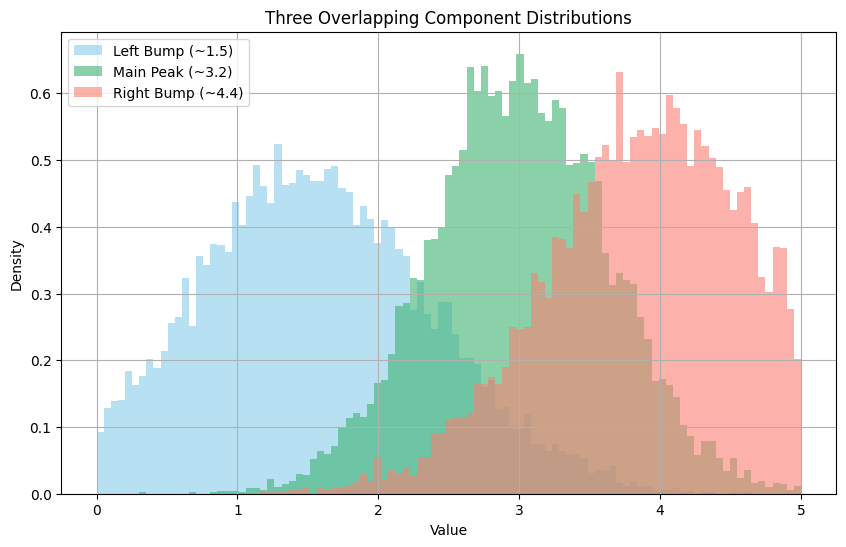

In [54]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Spread-out versions of each component
def left_pdf(x):
    return np.exp(-((x - 1.5) ** 2) / 1.5)  # wider spread

def main_pdf(x):
    return np.exp(-((x - 3.0) ** 2) / 0.8)

def right_pdf(x):
    return np.exp(-((x - 4.0) ** 2) / 1.3)

# Generic rejection sampler
def rejection_sampler(pdf_func, n_samples, xmin=0.01, xmax=4.99):
    x_vals = np.linspace(xmin, xmax, 1000)
    max_pdf = np.max(pdf_func(x_vals))

    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(xmin, xmax)
        y = np.random.uniform(0, max_pdf)
        if y < pdf_func(x):
            samples.append(x)
    return np.array(samples)

# Sample each component separately
n = 10000
left_samples = rejection_sampler(left_pdf, n)
main_samples = rejection_sampler(main_pdf, n)
right_samples = rejection_sampler(right_pdf, n)

# Plotting
plt.figure(figsize=(10, 6))
bins = np.linspace(0, 5, 100)

plt.hist(left_samples, bins=bins, alpha=0.6, label='Left Bump (~1.5)', density=True, color='skyblue')
plt.hist(main_samples, bins=bins, alpha=0.6, label='Main Peak (~3.2)', density=True, color='mediumseagreen')
plt.hist(right_samples, bins=bins, alpha=0.6, label='Right Bump (~4.4)', density=True, color='salmon')

plt.title("Three Overlapping Component Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

np.random.seed(42)  # For reproducibility

# Range and sample size
low, high = 0, 5
size = 10000

# Skewed distributions using skewnorm
right_skewed = skewnorm.rvs(a=6, loc=3.2, scale=1.2, size=size)  # skewed right
# centered_slight_right = np.random.normal(loc=3.0, scale=0.5, size=size)  # slight right of center
# left_skewed = skewnorm.rvs(a=-6, loc=3.2, scale=1.2, size=size)  # skewed left

# Clip all values to [0, 5)
right_skewed = np.clip(right_skewed, low + 0.05, high - 0.05)
# centered_slight_right = np.clip(centered_slight_right, low, high - 0.05)
# left_skewed = np.clip(left_skewed, low, high - 1e-6)

# Plotting
plt.figure(figsize=(10, 6))
bins = np.linspace(0, 5, 100)

plt.hist(right_skewed, bins=bins, alpha=0.6, label='Right Skewed', density=True, color='orange')
# plt.hist(centered_slight_right, bins=bins, alpha=0.6, label='Centered Slight Right', density=True, color='green')
# plt.hist(left_skewed, bins=bins, alpha=0.6, label='Left Skewed', density=True, color='blue')

plt.title("Simulated Distributions in Range [0, 5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

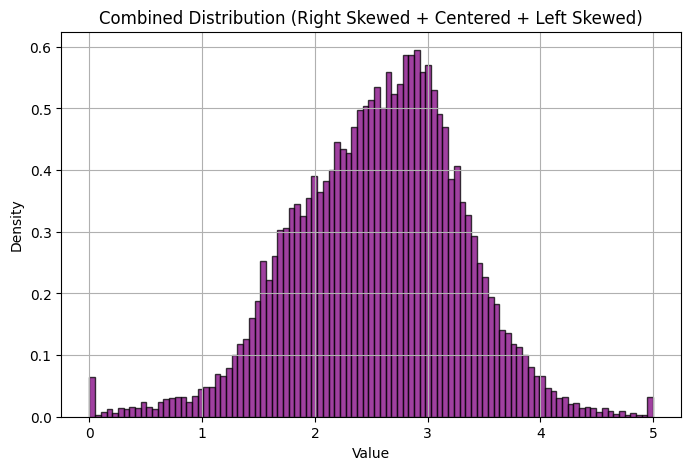

In [ ]:
combined = np.concatenate([right_skewed, centered_slight_right, left_skewed])

# Plot combined histogram
plt.figure(figsize=(8, 5))
bins = np.linspace(0, 5, 100)

plt.hist(combined, bins=bins, alpha=0.75, color='purple', edgecolor='black', density=True)
plt.title("Combined Distribution (Right Skewed + Centered + Left Skewed)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

Mean: 2.9901
Proportion > 4.2: 0.1287
Proportion < 0.8: 0.1302


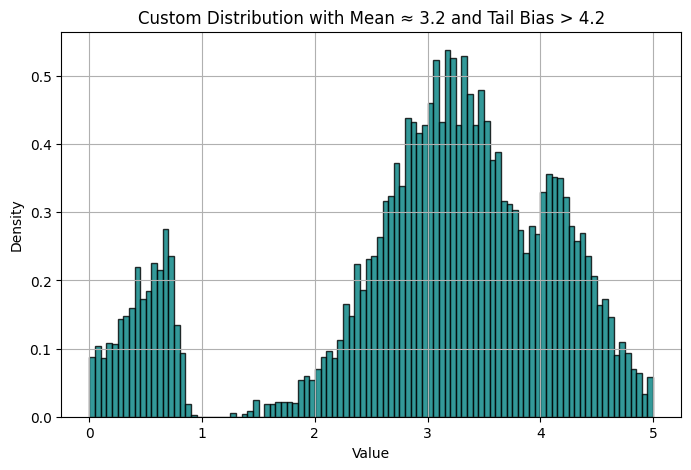

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

np.random.seed(42)

# Total sample size
size = 10000

# 70% from a normal distribution centered around 3.2
main = np.random.normal(loc=3.2, scale=0.6, size=int(0.7 * size))

# 15% from a right-skewed distribution to bias more values above 4.2
tail_high = skewnorm.rvs(a=10, loc=4.0, scale=0.5, size=int(0.15 * size))

# 15% from a left-skewed distribution for values below 0.8 (but fewer in number)
tail_low = skewnorm.rvs(a=-10, loc=0.8, scale=0.5, size=int(0.15 * size))

# Combine and clip to (0, 5)
combined = np.concatenate([main, tail_high, tail_low])
combined = combined[(combined > 0) & (combined < 5)]

# Optional: trim or pad to exact size if needed
if len(combined) > size:
    combined = np.random.choice(combined, size=size, replace=False)
elif len(combined) < size:
    padding = np.random.normal(loc=3.2, scale=0.3, size=(size - len(combined)))
    padding = padding[(padding > 0) & (padding < 5)]
    combined = np.concatenate([combined, padding])
    combined = np.random.choice(combined, size=size, replace=False)

# Print stats
print(f"Mean: {np.mean(combined):.4f}")
print(f"Proportion > 4.2: {np.mean(combined > 4.2):.4f}")
print(f"Proportion < 0.8: {np.mean(combined < 0.8):.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.hist(combined, bins=100, color='teal', alpha=0.8, edgecolor='black', density=True)
plt.title("Custom Distribution with Mean ≈ 3.2 and Tail Bias > 4.2")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


Mean: 3.0459
Proportion > 4.2: 0.0640
Proportion < 0.8: 0.0050


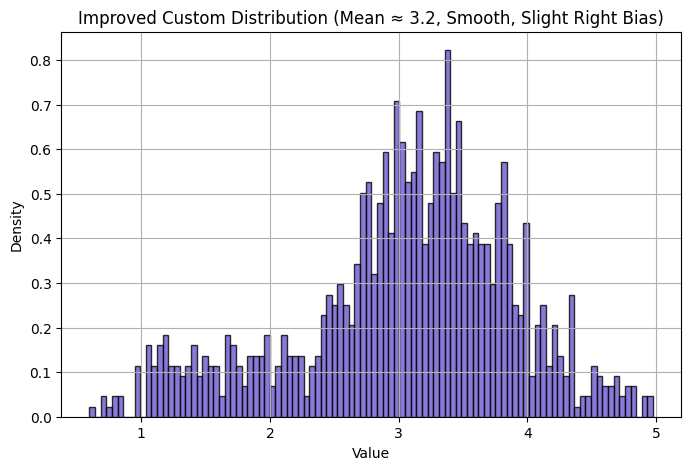

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def custom_pdf(x):
    return (
        np.exp(-((x - 3.2) ** 2) / 0.7) +       # main peak
        0.15 * np.exp(-((x - 4.4) ** 2) / 0.2) +# right bump
        0.2 * np.exp(-((x - 1.5) ** 2) / 0.3)   # left bump (⬅️ ADD THIS)
    )

# Rejection sampling
def sample_from_custom_pdf(n_samples=1000, xmin=0.01, xmax=4.99, bins=1000):
    x_vals = np.linspace(xmin, xmax, bins)
    pdf_vals = custom_pdf(x_vals)
    pdf_vals /= np.max(pdf_vals)  # normalize to [0, 1] for rejection

    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(xmin, xmax)
        y = np.random.uniform(0, 1)
        if y < custom_pdf(x) / np.max(pdf_vals):
            samples.append(x)
    return np.array(samples)

# Generate samples
samples = sample_from_custom_pdf()

# Summary stats
print(f"Mean: {np.mean(samples):.4f}")
print(f"Proportion > 4.2: {np.mean(samples > 4.2):.4f}")
print(f"Proportion < 0.8: {np.mean(samples < 0.8):.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=100, density=True, color='slateblue', edgecolor='black', alpha=0.8)
plt.title("Improved Custom Distribution (Mean ≈ 3.2, Smooth, Slight Right Bias)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [ ]:
samples

array([3.65532983, 3.00355276, 4.15556435, ..., 2.7396284 , 4.2288714 ,
       4.79407349], shape=(10000,))

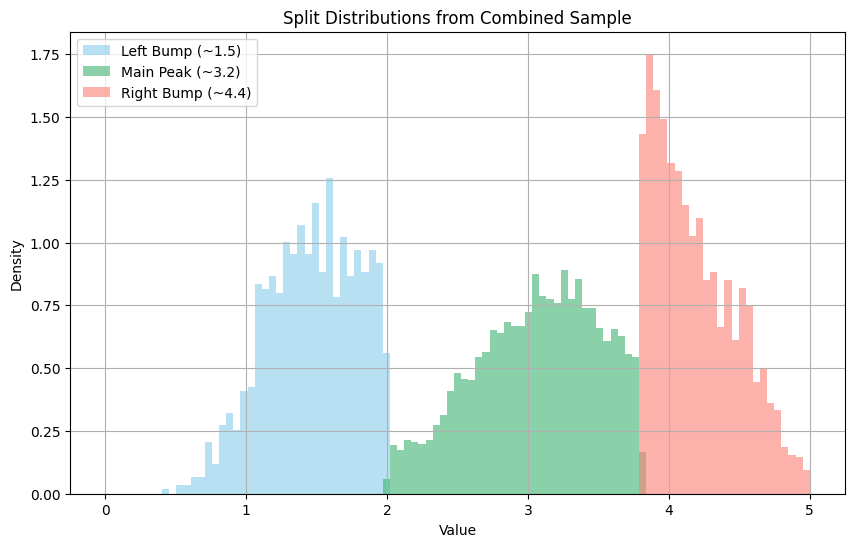

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Define the same PDF
def custom_pdf(x):
    return (
        np.exp(-((x - 3.2) ** 2) / 0.7) +
        0.15 * np.exp(-((x - 4.4) ** 2) / 0.2) +
        0.2 * np.exp(-((x - 1.5) ** 2) / 0.3)
    )

# Rejection sampling
def sample_from_custom_pdf(n_samples=10000, xmin=0.01, xmax=4.99, bins=1000):
    x_vals = np.linspace(xmin, xmax, bins)
    pdf_vals = custom_pdf(x_vals)
    pdf_vals /= np.max(pdf_vals)

    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(xmin, xmax)
        y = np.random.uniform(0, 1)
        if y < custom_pdf(x) / np.max(pdf_vals):
            samples.append(x)
    return np.array(samples)

# Generate the full sample
samples = sample_from_custom_pdf()

# Split into 3 based on x-ranges (approximate modes)
main_peak = samples[(samples > 2.0) & (samples < 3.8)]
right_bump = samples[samples >= 3.8]
left_bump = samples[samples <= 2]

# Plot each
plt.figure(figsize=(10, 6))
bins = np.linspace(0, 5, 100)

plt.hist(left_bump, bins=bins, alpha=0.6, label='Left Bump (~1.5)', density=True, color='skyblue')
plt.hist(main_peak, bins=bins, alpha=0.6, label='Main Peak (~3.2)', density=True, color='mediumseagreen')
plt.hist(right_bump, bins=bins, alpha=0.6, label='Right Bump (~4.4)', density=True, color='salmon')

plt.title("Split Distributions from Combined Sample")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
left_samples

array([0.78697283, 0.91548834, 1.52512637, ..., 2.76393884, 0.97091391,
       0.94836592], shape=(10000,))